## Black Friday - How much do people purchase?

Black Friday is the day after Thanksgiving and considered the first day of the Christmas shopping season. Retailers often entice customers to start shopping heavily as it offers many discounts.

This notebook will be exploring what demographics are represented in the dataset and which features influence the amount of purchasing.

In [1]:
#Load libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.simplefilter('ignore')


In [2]:
# Get the data
os.chdir(r"C:\Users\Admin\Documents\Transfer\DataSets\Kaggle Submissions\Black Friday")
df = pd.read_csv("BlackFriday.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
## Check the shape 
df.fillna(value=0,inplace=True)
df.shape

(537577, 12)

In [4]:
## Drop duplicates
df = df.drop_duplicates(keep= 'first')

In [5]:
df.shape

(537577, 12)

In [6]:
## Check the info 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            537577 non-null float64
Product_Category_3            537577 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 53.3+ MB


In [7]:
df.drop(['User_ID',
         'Product_ID',
         'Product_Category_1',
         'Product_Category_2',
         'Product_Category_3'], inplace=True, axis=1)

In [8]:
## Check the stats
df.describe()

,Occupation,Marital_Status,Purchase
count,537577.00000,537577.000000,537577.000000
mean,8.08271,0.408797,9333.859853
std,6.52412,0.491612,4981.022133
min,0.00000,0.000000,185.000000
25%,2.00000,0.000000,5866.000000
50%,7.00000,0.000000,8062.000000
75%,14.00000,1.000000,12073.000000
max,20.00000,1.000000,23961.000000


In [9]:
## Find how many null values
df.isnull().sum()

Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Purchase                      0
dtype: int64

Exploring the features to see how many the unique and what type of unique features are within the dataset.

In [10]:
## Find how many unique values
df.nunique()

Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Purchase                      17959
dtype: int64

In [11]:
## Find the unique values in a single column
df.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [12]:
df.Occupation.unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [13]:
## Only look for the columns with numbers
df_num = df.select_dtypes(include = ['float64', 'int64'])

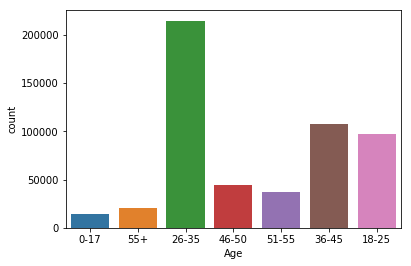

In [14]:
sns.countplot(df['Age'])

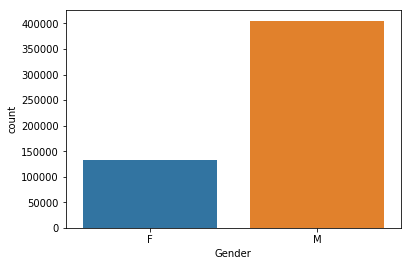

In [15]:
sns.countplot(df['Gender'])

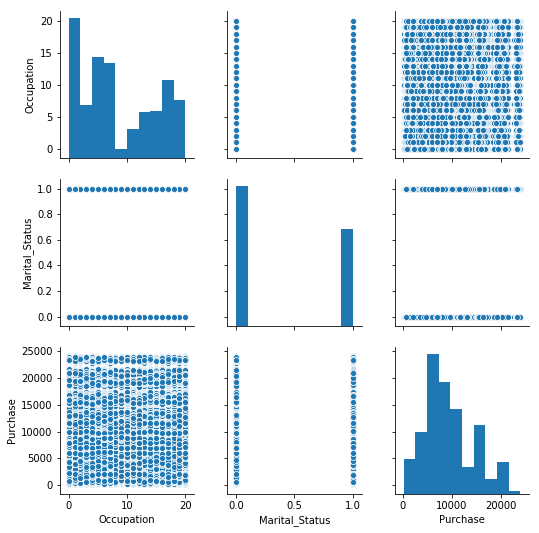

In [16]:
sns.pairplot(df)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000234C8888550>]],
      dtype=object)

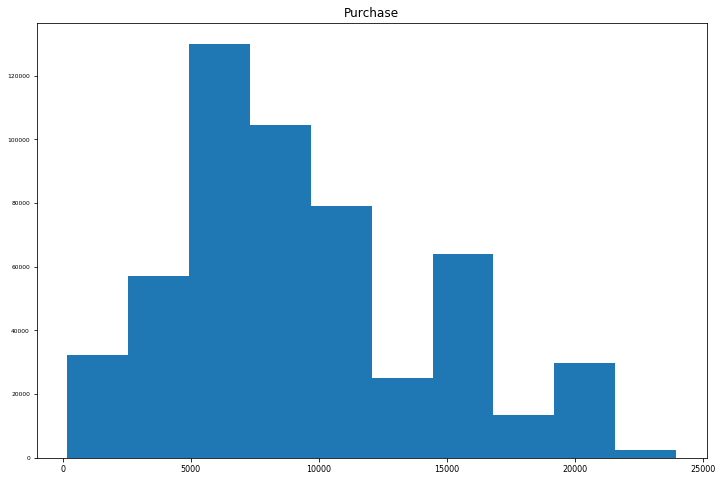

In [17]:
## Larger distribution plot for purchases (target)
df_num.drop(['Marital_Status', 'Occupation'], axis=1, inplace=True)
df_num.hist(figsize=(12, 8), bins=10, xlabelsize=8, ylabelsize=6, grid=False)

In [18]:
## See all the correlations against other features
df.corr(method='pearson')

,Occupation,Marital_Status,Purchase
Occupation,1.000000,0.024691,0.021104
Marital_Status,0.024691,1.000000,0.000129
Purchase,0.021104,0.000129,1.000000


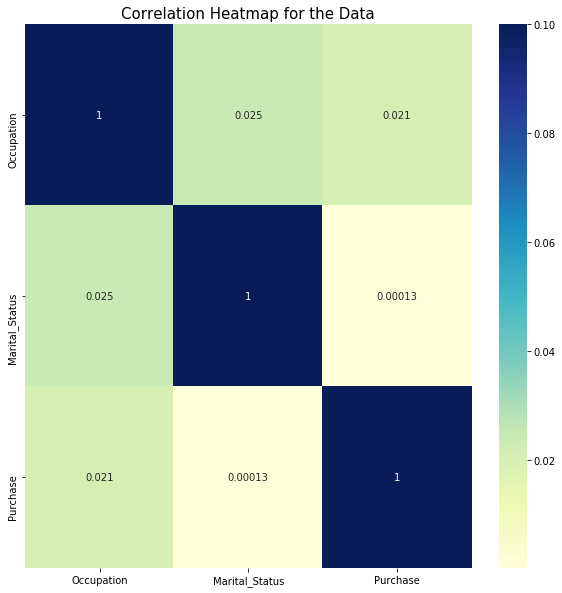

In [19]:
## Heat Map of correlations

fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(df.corr(), cmap = 'YlGnBu', annot = True, ax=ax, vmax=.1)
plt.title('Correlation Heatmap for the Data', fontsize = 15)
plt.show()

### Preprocess the Data

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

df_ML = df

df_ML = df_ML.sample(frac=0.02,random_state=100)

df_ML['Gender'] = np.where(df_ML['Gender']=='M',1,0)
df_Age = pd.get_dummies(df_ML.Age, prefix='Age')
df_City = pd.get_dummies(df_ML.City_Category, prefix='City_Category')
df_Stay = pd.get_dummies(df_ML.Stay_In_Current_City_Years, prefix='Stay_In_Current_City')
df_ML = pd.concat([df_ML, df_Age, df_City, df_Stay],axis=1)

df_ML.drop(['Age','City_Category','Stay_In_Current_City_Years'],axis=1,inplace=True)

y = df_ML['Purchase']

X = df_ML.drop(['Purchase'], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)




In [28]:
X_test.shape

(2688, 18)

The regression analysis was disapointing as the accuracy score was quite low. More exploration and tuning would need to be required on this dataset to see if the accuracy score would improve. That being said, the importance ranking provides an interesting insight into what influences the amount of purchases. Occupation appears to influence the purchases the most - which makes sense as it would be related to income/disposable income. 

In [29]:
from sklearn.metrics import r2_score

rf = RandomForestRegressor(n_estimators=10000).fit(X_train,y_train)
y_predicted = rf.predict(X_test)
model = rf.fit(X_train, y_train)
print("Mean Squared Error: ", mean_squared_error(y_test, y_predicted))
print("Accuracy Score: ", round(model.score(X_train, y_train) * 100, 2),"%")
print("r2 score: ", r2_score(y_test, y_predicted))

Mean Squared Error:  26876570.91095725
Accuracy Score:  25.17 %
r2 score:  -0.11906165052886286


Text(0.5, 0, 'Importance')

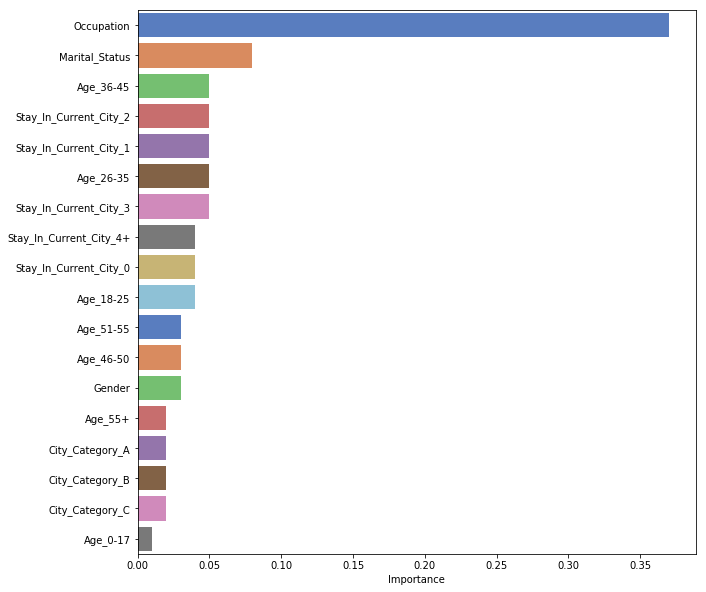

In [23]:
f_im = rf.feature_importances_.round(2)
rank = pd.Series(f_im,index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10.0,10.0))
sns.barplot(y=rank.index,x=rank.values,palette='muted')
plt.xlabel('Importance')